In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

http://www.raspberrypi.org/forums/viewtopic.php?f=43&t=98206
  

In [79]:
from DeepPSF.controller import experiment
from DeepPSF.controller import plot
from DeepPSF.controller import GPPSF
import numpy as np
from scipy.stats import poisson
from IPython.html.widgets import interact, interactive, fixed


Take an initial image and then take another shot with movement. return both.

In [96]:
length = 400
trials = 1000
paths = np.zeros((6,length,trials))
psfs = []
poisson_mu = 40
shutter_vals = poisson.rvs(mu=poisson_mu,size = trials)
shutter_length = 200
for i in xrange(trials):
  #exphyp=[0.1,0.01]
  samples = GPPSF.GPsamples(M = length)
  #print samples[:3000:70].shape
  
  index = np.min([shutter_vals[i],length-shutter_length]) - 1
  psf = GPPSF.conevertSamples2psf(samples[index:(index+shutter_length)])
  
  psfs.append(psf)
  paths[:3,:,i] = (samples.T-samples.T.mean())*3000

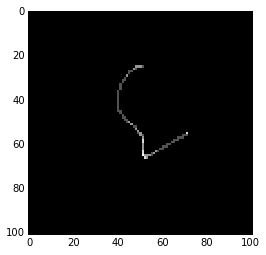

In [99]:
plt.imshow(psfs[500], cmap= cm.Greys_r,interpolation='nearest')

In [44]:
#paths[[0,2],:,:] = 0.0
res_2 = []
for j in xrange(paths.shape[2]):
  res_2.append(
    experiment.experiment(float(0),paths[:,::70,j].T,init =paths[:,0,j].T[np.newaxis,:],)+
    (paths[:,:,j].T,))

60a7db85-efef-4f65-8733-20c61e0a3492
waiting Hexapod
60a7db85-efef-4f65-8733-20c61e0a3492
waiting Hexapod
60a7db85-efef-4f65-8733-20c61e0a3492
0.0
image not ready 1
image not ready 2
image not ready 3
image not ready 4
hexapod not ready 1
4423b0cf-eb4a-432f-bc84-5043c10e4bea
waiting Hexapod
4423b0cf-eb4a-432f-bc84-5043c10e4bea
waiting Hexapod
4423b0cf-eb4a-432f-bc84-5043c10e4bea
0.0
image not ready 1
image not ready 2
image not ready 3
image not ready 4
hexapod not ready 1
80e0c0c1-0f8d-4f96-8084-c24e988ac685
waiting Hexapod
80e0c0c1-0f8d-4f96-8084-c24e988ac685
waiting Hexapod
80e0c0c1-0f8d-4f96-8084-c24e988ac685
0.0
image not ready 1
image not ready 2
image not ready 3
image not ready 4
hexapod not ready 1


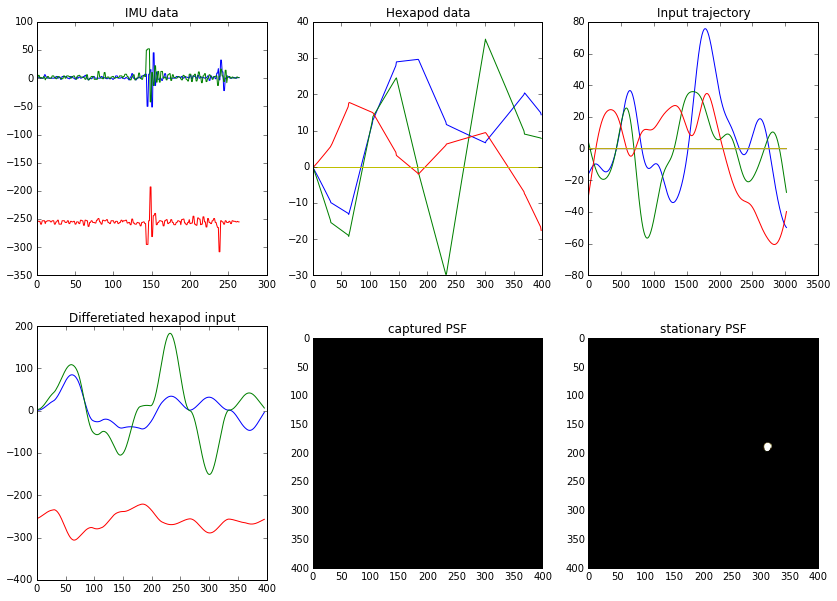

In [46]:
i = interact(lambda i,c_y,c_x:plot.plot_(i,res_2,c_x=c_x,c_y=c_y,w=400),
         i=(0,len(res_2)),c_y=1097,c_x=429)

In [123]:
from matplotlib import cm
from DeepPSF.controller.utils import smooth
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import numpy as np

def crop(data, point, size):
  return data[point[0]:(point[0]+size[0]),point[1]:(point[1]+size[1])]


def plot_(i,data,c_x=600,c_y=1200,w=400):
  plt.figure(figsize=(14,10))
  plt.subplot(2,3,1)
  smooth_IMU = np.zeros(data[i][1].shape)
  smooth_IMU[:,3] = smooth(data[i][1][:,3],window_len=10)
  smooth_IMU[:,4] = smooth(data[i][1][:,4],window_len=10)
  smooth_IMU[:,5] = smooth(data[i][1][:,5],window_len=10)
  plt.plot((smooth_IMU[:,[3,5,4]]-smooth_IMU[:,[3,5,4]].mean(axis=0))+smooth_IMU[:,[3,5,4]].mean(axis=0))
  plt.title('IMU data')
  
  plt.subplot(2,3,2)
  plt.plot(data[i][0][:,1:])
  plt.title('Hexapod data')
  
  plt.subplot(2,3,3)
  plt.plot(data[i][4])
  plt.title('Input trajectory')
  
  plt.subplot(2,3,4)
  smooth_path = np.zeros(data[i][4].shape)
  smooth_path[:,1] = smooth(data[i][4][:,1],window_len=30)
  smooth_path[:,2] = smooth(data[i][4][:,2],window_len=30)
  smooth_path[:,3] = smooth(data[i][4][:,3],window_len=30)
  vel = -smooth_path[1:,1:4]+smooth_path[:-1,1:4]
  acc = (-vel[1:,:]+vel[:-1,:])*400 + data[i][1][:,[3,5,4]].mean(axis =0)
  plt.plot(acc)
  plt.title('Differetiated hexapod input')

  plt.subplot(2,3,5)
  #plt.imshow(data[i][2],interpolation = 'nearest')
  plt.title('captured PSF')
  plt.imshow(crop(data[i][2],(c_x,c_y),(w,w)),interpolation='nearest',cmap=cm.Greys_r,
             vmin = data[i][2].min(),vmax = data[i][2].max())
  
  plt.subplot(2,3,6)
  plt.title('stationary PSF')
  plt.imshow(crop(data[i][3],(c_x,c_y),(w,w)),interpolation = 'nearest',cmap=cm.Greys_r)